## Geração de Dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from mlxtend.plotting import plot_decision_regions

No conjunto de dados X colocamos os dados das colunas referentes às palavras. Basicamente X são todas as colunas menos a coluna target, definida na linha anterior. Já a variável y conserva apenas os dados do objetivo target.

## Criação de Bolhas de Dados

In [2]:
from sklearn.datasets.samples_generator import make_blobs

n_features = 2
n_samples = 300
n_classes = 2

_X, _y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=n_features, cluster_std = 0.5, random_state = 1)

O conjunto de dados $X$ possui dois atributos com valores gerados aleatoriamente

In [3]:
_X[:10]

array([[-10.50865548,  -3.55608443],
       [ -9.65571184,  -4.13005354],
       [ -2.2694321 ,   5.63117419],
       [ -1.63772541,   4.29333275],
       [ -1.56041005,   4.46599419],
       [ -1.39482724,   4.47534047],
       [-10.06570117,  -4.35198344],
       [ -1.20913193,   4.06462594],
       [ -1.98301825,   4.85723331],
       [-10.20914098,  -3.91011634]])

O vetor de dados $y$ possui o valor das classes (centers).

In [4]:
_y[:10]

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [5]:
groups = ['A','B','C','D','E','F']
y_g = [groups[i] for i in _y]

In [6]:
import pandas as pd
data = pd.DataFrame({
    'x1' : _X[:,0], 
    'x2' : _X[:,1], 
    'target' : y_g})

data["target"] = data["target"].astype('category')


In [7]:
data.head()

,x1,x2,target
0,-10.508655,-3.556084,B
1,-9.655712,-4.130054,B
2,-2.269432,5.631174,A
3,-1.637725,4.293333,A
4,-1.560410,4.465994,A


## Visualização dos Dados

(-11.805268655928765,
 0.15893877339231222,
 -5.904747612126316,
 6.191306024310512)

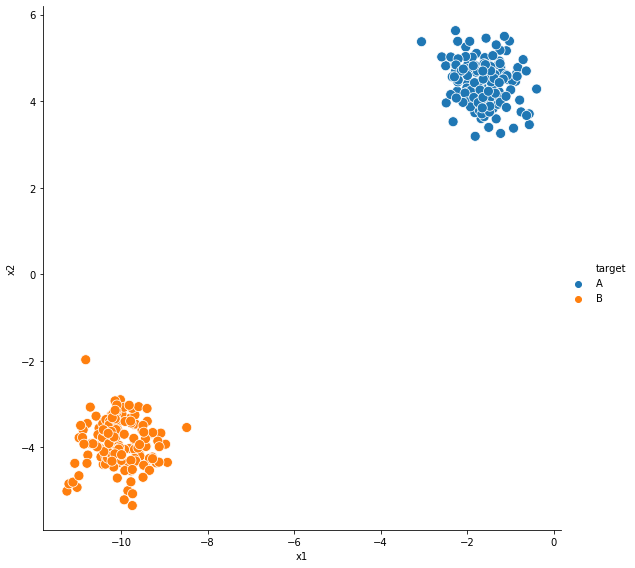

In [8]:
sns.relplot(x='x1', y='x2', hue='target', data = data, height=8, s=100)
plt.axis('equal')

## Escolha do Objetivo e Preparação dos Dados para Indução

Definindo qual é o nome da coluna que é nosso objetivo de predição (classificação)

In [9]:
target = "target"

No conjunto de dados X colocamos os dados das colunas referentes aos atributos. Basicamente X são todas as colunas menos a coluna target, definida na linha anterior. Já a variável y conserva apenas os dados do objetivo target.

In [10]:
X = data.drop([target], axis=1)
y = data[target].factorize()[0]

In [11]:
X.head()

,x1,x2
0,-10.508655,-3.556084
1,-9.655712,-4.130054
2,-2.269432,5.631174
3,-1.637725,4.293333
4,-1.560410,4.465994


In [12]:
y[:6]

array([0, 0, 1, 1, 1, 1], dtype=int64)

## Separação dos Dados em Treino e Teste

Deixamos 25% para teste, a separação será estratificada e a semente é 10.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state=10)

## Definição do Classificador

In [14]:
# Definir o classificador
from sklearn import svm
model = svm.SVC(C=1.0, kernel = "linear", max_iter = 1000)

In [15]:
# Printar o classificador para ver os seus parâmetros
model.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=1000, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## Predição do Conjunto de Teste 

In [16]:
y_test_pred = model.predict(X_test)

In [17]:
y_test_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

## Avaliação da Predição

### Matriz de Confusão

In [18]:
from pandas import crosstab
crosstab(y_test, y_test_pred, rownames = ['y_test'], colnames = ['y_test_pred ->']  )

y_test_pred ->,0,1
y_test,,
0,37,0
1,0,38


Há uma outra forma direta de fazer a matriz de confusão, no entanto não é muito boa de visualizar, pois retorna apenas uma matriz.

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[37,  0],
       [ 0, 38]], dtype=int64)

### Métrica de Acurácia

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

1.0

### Métricas de Avaliação por Classe: precision, recall e f1-score

In [21]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        38

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



## Visualização das Predições

In [22]:
y

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0], d

Text(0.5, 1.0, 'SVM')

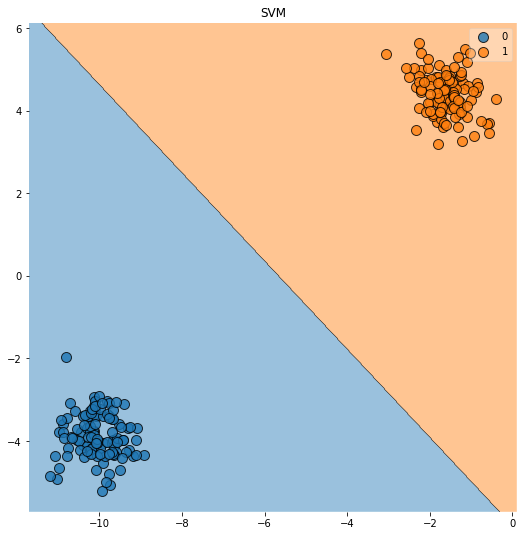

In [23]:
fig, ax = plt.subplots(figsize=(9, 9))
plot_decision_regions(X_train.to_numpy(), y_train, clf=model, legend=1, ax= ax, markers = 'o', zoom_factor = 2, scatter_kwargs = {'s': 100})
ax.set_aspect('equal')
ax.set_title('SVM')

Text(0.5, 1.0, 'SVM')

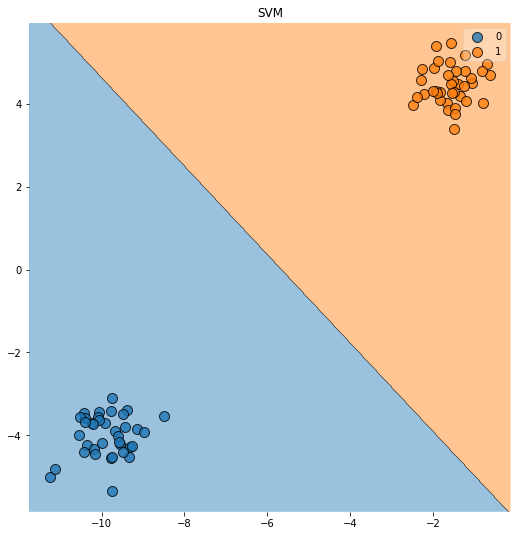

In [24]:
fig, ax = plt.subplots(figsize=(9, 9))
plot_decision_regions(X_test.to_numpy(), y_test, clf=model, legend=1, ax= ax, markers = 'o', zoom_factor = 2, scatter_kwargs = {'s': 100})
ax.set_aspect('equal')
ax.set_title('SVM') 

In [25]:
from ipywidgets import interact, interactive, fixed,interact_manual
import ipywidgets as widgets
from IPython.display import display

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
model.coef_

C:\Users\andres\Anaconda3\envs\dm\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[0.23576331, 1.43726074]])

In [27]:
model.intercept_

array([0.21741421])

In [28]:
def func (w1, w2, b) :
    model.coef_= np.array([[w1,w2]])
    model.intercept_ = b    
    fig, ax = plt.subplots(figsize=(9, 9))
    plot_decision_regions(X_train.to_numpy(), y_train, clf=model, legend=1, ax= ax, markers = 'o', zoom_factor = 2, scatter_kwargs = {'s': 100})
    ax.set_aspect('equal')
    ax.set_title('SVM') 
    

In [29]:
y=interactive(func,w1=(-10,10,0.1),w2=(-10,10,0.1),b=(-10,10,0.1))
display(y)

interactive(children=(FloatSlider(value=0.0, description='w1', max=10.0, min=-10.0), FloatSlider(value=0.0, de…

In [35]:
def logistic_regression_plot(w1,w2,b):    
    model.coef_= np.array([[w1,w2]])
    model.intercept_ = b    
    fig, ax = plt.subplots(figsize=(8, 8))
    plot_decision_regions(X_train.to_numpy(), y_train, clf=model, legend=1, ax= ax, markers = 'o', zoom_factor = 2, scatter_kwargs = {'s': 100})
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['não compraria', 'compraria'], framealpha=0.3, scatterpoints=1)
    ax.set_xlabel(r'$x_1$ (IBU)')
    ax.set_ylabel(r'$x_2$ (Alchool)')
    ax.set_aspect('equal')

plt.rcParams.update({'font.size': 16})
from ipywidgets import Layout, Button, Box
box_layout = Layout(border='solid', )


function_math = widgets.HTMLMath(value=r"<b>Modelo de Classificação</b> $$f(X) = w_1 x_1 + w_2 x_2 + b$$", description='')
w1 = widgets.FloatSlider(min=-3,max=3,step=0.1, description = r'$w_1$', value = 0.3, continuous_update=False )
w2 = widgets.FloatSlider(min=-3,max=3,step=0.1, description = r'$w_2$', value = -0.5, continuous_update=False)
b  = widgets.FloatSlider(min=-3,max=3,step=0.1, description = 'b', value = 0.3, continuous_update=False)


ui = widgets.HBox([w1, w2, b])

out = widgets.interactive_output(logistic_regression_plot, {'w1': w1, 'w2': w2, 'b': b})

**Parâmetros do Classificador**

In [36]:
display(ui, out)

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 576x576 with 1 Axes>', 'i…

In [32]:
@widgets.interact_manual(w1=(-10,10,0.1),w2=(-10,10,0.1),b=(-10,10,0.1), )
def func (w1, w2, b) : logistic_regression_plot(w1,w2,b)

interactive(children=(FloatSlider(value=0.0, description='w1', max=10.0, min=-10.0), FloatSlider(value=0.0, de…

In [33]:
from ipywidgets import AppLayout, Button, VBox,GridspecLayout

vbox = widgets.VBox([w1, w2, b], layout = Layout(width='100%'))

AppLayout(left_sidebar=vbox,
          center=out,
          grid_gap='20px',
          justify_items='center',
          align_items='center')

AppLayout(children=(VBox(children=(FloatSlider(value=0.3, continuous_update=False, description='$w_1$', max=3.…

In [34]:
# create a 10x2 grid layout
grid = GridspecLayout(6, 2)
# fill it in with widgets
grid[:, 0] = out
grid[0, 1] = function_math
grid[1, 1] = w1
grid[2, 1] = w2
grid[3, 1] = b
# set the widget properties
grid[:, 0].layout.height = 'auto'

grid

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001', height='auto')), HTMLMath(value='<b>Model…